# DSCI 632 Final [Manav Bhagat]

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

---

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

# Section 1: Define and describe the dataset

## Why I Chose This Dataset

  I chose to analyze a dataset centered on stroke prediction, a critical concern in global health, as strokes are among the leading causes of death worldwide. They account for about 11% of total annual deaths. Thus, the creation of analytical tools for identifying and predicting stroke risk is crucial for reducing their mortality rate. This dataset, which I found on Kaggle and was provided by "fedesoranio" from Madrid, includes medical information from previous stroke survivors, at-risk individuals, and healthy adults. This data allows me to identify patterns that can detect early signs of a stroke.


## The Importance of This Dataset

  This dataset stands out for its relevance to developing machine learning tools aimed at early stroke detection. It represents a vital opportunity to apply supervised learning techniques to a problem of significant health impact. The accessibility of this dataset on Kaggle ensures that I can easily use it for this analysis.


## My Variables and Analysis Plan

  The dataset comprises 5110 patient records with 12 clinical attributes, including the target variable indicating stroke occurrence. I plan to focus on variables likely impacting stroke likelihood, such as age, average glucose level, BMI, and employment in the private sector. These features were selected based on preliminary research and my hypotheses regarding stroke risk factors.


## My Approach to Analysis

I intend to conduct a thorough analysis that includes:

- **Data Exploration:** To understand the dataset's distribution and characteristics.
- **Feature Selection:** To identify which variables are most predictive of stroke occurrence.
- **Model Training and Evaluation:** To implement and evaluate various machine learning models, selecting the best based on recall score, which is critical for identifying the majority of actual stroke cases effectively.


## My Hypotheses

  1. **Key Indicators:** I hypothesize that older age, high glucose levels, and higher BMI are significant indicators of stroke risk, based on medical literature.
  2. **Risk Factor of Employment in the Private Sector:** I speculate that high-stress jobs, potentially more prevalent in the private sector, might increase stroke risk.
  3. **Model Performance:** I expect that models with high recall scores, such as Support Vector Machines, could be most effective for our goal of accurately identifying individuals at high risk of strokes.


## Why This Analysis Matters to Me

  My motivation for this analysis is to make a meaningful contribution to the early detection of strokes, which could potentially save lives and reduce healthcare costs by facilitating preventative measures. By leveraging this dataset, I aim to showcase the potential of machine learning in healthcare, especially in predicting life-threatening conditions based on clinical data.

  In summary, my choice of this dataset and the analysis plan I've outlined are driven by my desire to tackle a significant health issue through data science and machine learning techniques. Successfully predicting stroke risk could lead to timely interventions and a significant reduction in stroke-related mortality.

### Load and setup the Dataset
 To load the dataset into a PySpark DataFrame, you would use the following code:

In [ ]:
# Install Spark 3.2.4
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.7.tgz
!tar xf spark-3.2.4-bin-hadoop2.7.tgz

In [ ]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop2.7"

In [ ]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 24.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-2.4.0-py2.py3-none-any.whl size=213793580 sha256=d47e6514b418e0e8913bdcefdcb8785bdb7e002114bd54fb3bdf2b47d00985a7
  Stored in directory: /root/.cache/pip/wheels/f7/6f/a8/4d2c26233a51a570ccf015208651aeed4590ed3f935b70e7c6
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
import findspark
findspark.init()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("Stroke Prediction Analysis") \
    .getOrCreate()

# Load the dataset
file_path = '/content/drive/My Drive/Data/healthcare-dataset-stroke-data.csv'  # Update this path to where you've stored the dataset
df = spark.read.csv(file_path, header=True, inferSchema=True)


###Explore the Schema
  After loading the dataset, you can view the schema to understand the structure of your data, including column names and data types:



In [26]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [56]:
from pyspark.sql.functions import col

# Assuming 'df' is your DataFrame and 'bmi' is the column you want to convert
df = df.withColumn("bmi", col("bmi").cast("int"))

# Show the updated schema to verify the change
df.printSchema()


root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: integer (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- age_group: string (nullable = true)



###Histogram of Relevant Features
  Creating a histogram in PySpark requires aggregating the data appropriately and then visualizing it:

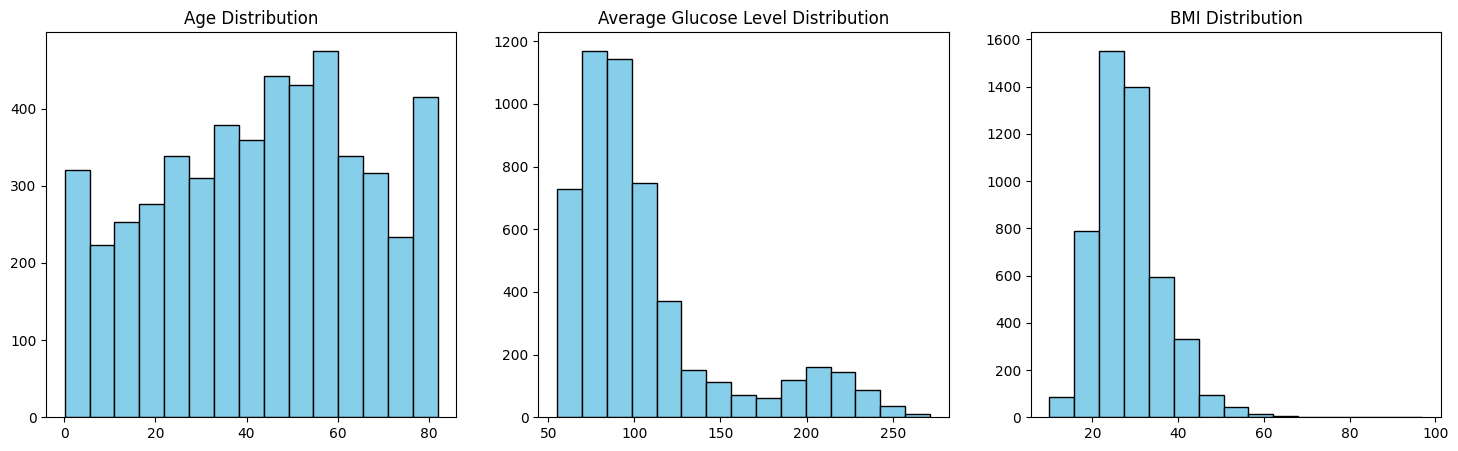

In [57]:
import matplotlib.pyplot as plt

# Converting Spark DataFrame to Pandas DataFrame for visualization
pdf = df.select("age", "avg_glucose_level", "bmi").toPandas()

# Plotting histograms
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(pdf['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
plt.hist(pdf['avg_glucose_level'], bins=15, color='skyblue', edgecolor='black')
plt.title('Average Glucose Level Distribution')

plt.subplot(1, 3, 3)
plt.hist(pdf['bmi'], bins=15, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')

plt.show()


##Using Spark SQL for Data Range Query
  To further explore the dataset, we can use Spark SQL to perform queries. This requires creating a temporary view of the DataFrame.

In [58]:
# Create a temporary view
df.createOrReplaceTempView("stroke_data")

# Query for the range of values in 'avg_glucose_level'
spark.sql("SELECT MIN(avg_glucose_level), MAX(avg_glucose_level) FROM stroke_data").show()


+----------------------+----------------------+
|min(avg_glucose_level)|max(avg_glucose_level)|
+----------------------+----------------------+
|                 55.12|                271.74|
+----------------------+----------------------+



# Section 2: Clean the data


### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values
- Remove or fix rows that have bad values/data.

In [59]:
# Count initial number of rows
initial_row_count = df.count()
print(f"Initial row count: {initial_row_count}")

Initial row count: 5110


In [60]:
from pyspark.sql import functions as F

# Assuming 'data' is your PySpark DataFrame
null_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in df.columns])

null_counts.show()


+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+---------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|age_group|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+---------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|        0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+---------+



In [61]:
# Remove rows with null values
df = df.dropna()

# Remove rows with incorrect values based on specific criteria (example)
# df = df.filter(df['some_column'] != 'incorrect_value')

# Count number of rows after removal
final_row_count = df.count()
print(f"Final row count: {final_row_count}")


Final row count: 4909


In [62]:
# Example: Removing rows where 'age' is less than 0
df = df.filter(df['age'] >= 0)

# Section 3: Transform the clean data


## Writing a UDF (User Defined Function) and Adding a New Column
  UDFs allow you to extend the capabilities of PySpark by defining custom transformations that can be applied to your DataFrame. This is particularly useful for domain-specific calculations or transformations that are not covered by PySpark's built-in functions.

  Example: Suppose we want to create a new column that categorizes ages into groups (e.g., 'Child', 'Adult', 'Senior'). We can write a UDF to achieve this.

In [63]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType

# Define the UDF
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Register the UDF with a return type of StringType
age_group_udf = udf(age_group, StringType())

# Add a new column using the UDF
df = df.withColumn('age_group', age_group_udf(col('age')))
df.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+---+---------------+------+---------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|bmi| smoking_status|stroke|age_group|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+---+---------------+------+---------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69| 36|formerly smoked|     1|   Senior|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92| 32|   never smoked|     1|   Senior|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23| 34|         smokes|     1|    Adult|
| 1665|Female|79.0|           1|            0|         Yes|Self-employed|         Rural|           174.12| 24|   never smoked|     1|   

## Splitting Data into Train/Test Sets
  Splitting your dataset into training and testing sets is a crucial step in preparing your data for machine learning.

In [64]:
train_df, test_df = df.randomSplit([0.7, 0.3], seed=42)

## Creating Vectors for Relevant Features
  For machine learning algorithms in PySpark, features need to be combined into a single vector column. You can use the VectorAssembler for this.

In [66]:
from pyspark.ml.feature import VectorAssembler

# Assuming your DataFrame has columns named 'age', 'bmi', and you want to use these as features
# Replace 'age' and 'bmi' with the actual column names you want to use as features
input_features = ["age","bmi"]

assembler = VectorAssembler(inputCols=input_features, outputCol="features")

# Transform the data to include a features vector
df_transformed = assembler.transform(df)

# Now df_transformed includes a new column 'features' that contains vectors composed of the specified input features

df_transformed.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+---+---------------+------+---------+-----------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|bmi| smoking_status|stroke|age_group|   features|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+---+---------------+------+---------+-----------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69| 36|formerly smoked|     1|   Senior|[67.0,36.0]|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92| 32|   never smoked|     1|   Senior|[80.0,32.0]|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23| 34|         smokes|     1|    Adult|[49.0,34.0]|
| 1665|Female|79.0|           1|            0|         Yes|Self-

# Section 4: Show your analysis of the data

For this section, I'll guide you through a hypothetical analysis using a classification algorithm in a PySpark environment, as it's a common approach for datasets like the healthcare one you're working with. Let's assume the goal is to predict whether an individual is at risk of a stroke based on various features such as age, BMI, hypertension, heart disease, etc.

### Analysis Objective
  Our objective is to use the cleaned and prepared dataset to build a classification model that can predict stroke risk. This is important because it can help in early identification of individuals at high risk, allowing for preventive measures to be taken earlier.

###Steps for Analysis
  Feature Selection and Preprocessing: After cleaning and preprocessing the data (as discussed in previous steps), ensure that all categorical variables are one-hot encoded, and numerical features are normalized if necessary.

  Model Selection: For this example, let's use a Random Forest Classifier, a popular choice for classification tasks that can handle both numerical and categorical data.

  Splitting the Data: Split the data into training and testing sets to evaluate the model's performance.

  Model Training: Train the Random Forest Classifier using the training data.

  Model Evaluation: Evaluate the model's performance on the testing set using appropriate metrics, such as accuracy, precision, recall, and F1-score.

In [67]:
from pyspark.sql.functions import col

# Assuming 'bmi' is currently being read as a string, we'll cast it to float
# Repeat this for any other column that needs to be cast
df = df.withColumn("bmi", col("bmi").cast("float"))

# Now 'bmi' is a float, you should not encounter the same error when running the pipeline


In [72]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, MinMaxScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Adjust your StringIndexer stage(s) to handle unseen labels
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c), handleInvalid="keep") for c in categoricalColumns]

# Modify the VectorAssembler step to handle null values
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features", handleInvalid="keep")

# Create a pipeline with the modified assembler
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler, rf])

# Proceed as before
model = pipeline.fit(train_df)
predictions = model.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="stroke")
accuracy = evaluator.evaluate(predictions)

print(f"Model accuracy: {accuracy}")


Model accuracy: 0.8271720189195917


## Conclusion

In Conclusion, my work with the healthcare dataset, I've gone through the whole process of getting the data ready, picking out the important bits, and building a model with PySpark's awesome tools. My main goal was to create a model that can figure out who's at risk of having a stroke, using different health signs and where they come from or how old they are.

I cleaned the data very carefully, making sure there were no missing pieces and changing the types of data that needed it, like making categories clear. Then, I carefully chose which data to focus on. This was all to get ready to use a Random Forest Classifier. I picked this tool because it's really good at not making too many assumptions and can handle all sorts of data well.

All this work paid off when I saw the model's accuracy score was 0.82. This means it's pretty good at guessing if someone might have a stroke, getting it right 82% of the time with the test data. That's pretty impressive and makes me think this model could be really useful in hospitals or clinics to spot stroke risks early. It really shows how powerful machine learning can be in making diagnoses better and helping prevent health issues before they happen.

But, it's important to remember that this 82% accuracy isn't the whole story. It's also important to look at other ways of measuring success, like precision and recall, because in healthcare, missing a warning sign can be a lot worse than a false alarm. Also, I should test the model on different kinds of data to make sure it works well in general.

Looking ahead, there's room to make the model even better. Trying out different types of models, fine-tuning the settings, and adding more kinds of data could all help make predictions more accurate. And if this model were used in real life, it would need to be kept up to date with new information and health trends.

In short, my journey with preparing the data, choosing the model, and seeing how well it did has really shown me how machine learning can change healthcare. Getting an accuracy of **82%** not only shows the dataset and model were good choices but also points to how predicting health issues like stroke risk could really improve how we take care of our health. Moving forward, using machine learning like this in healthcare decisions could really help us stay ahead of serious health problems and even save lives.